In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

#### Merging 12 months of sales data into a single file

In [3]:
files=glob.glob(r'C:\Users\hp\Documents\Sales analysis python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\*.csv')

dfs = [pd.read_csv(file) for file in files]
all_months_data = pd.concat(dfs)


all_months_data.to_csv(r'C:\Users\hp\Documents\Sales analysis python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\all_data.csv')


In [4]:
all_data = pd.read_csv(r'C:\Users\hp\Documents\Sales analysis python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\all_data.csv')

In [5]:
all_data.head(50)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


#### dropping NAN rows

In [6]:
all_data=all_data.dropna()

#### Adding Month column

In [7]:
all_data=all_data[all_data['Order Date'].str[0:2] != "Or"]

In [8]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')

#### Adding Sales column

In [9]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])


In [10]:
all_data['Sales']=all_data['Quantity Ordered']* all_data['Price Each']

### Task 1: What was the best month for sales? How much was earned in that month?

In [11]:
results=all_data.groupby('Month').sum(['Sales'])

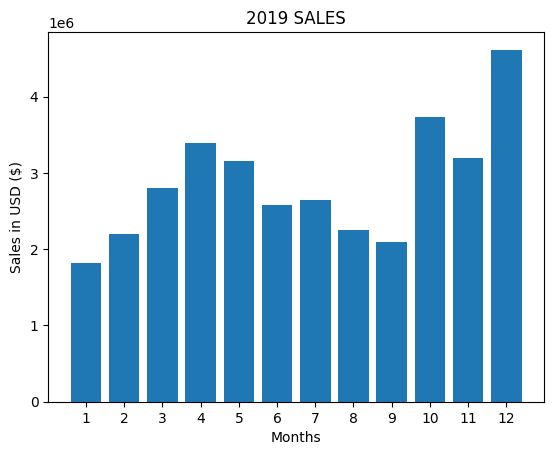

In [12]:
months= range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.title('2019 SALES')
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

### Task 2: What city had the highest number of sales?

#### splitting the city and states from the address

In [13]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x)+' '+ get_state(x))
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [14]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### Bar plot for performance of sales in different cities

In [15]:
results=all_data.groupby('City').sum(['Sales'])

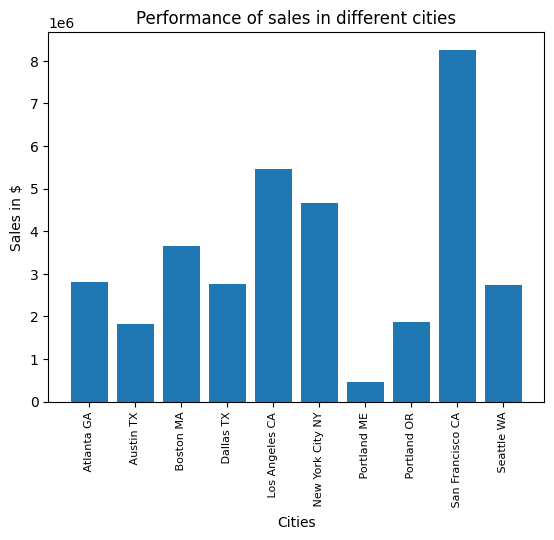

In [16]:
cities= [city for city ,df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.title('Performance of sales in different cities')
plt.xlabel('Cities')
plt.ylabel('Sales in $')

plt.show()

### Task3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [17]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [18]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hour']=all_data['Order Date'].dt.hour


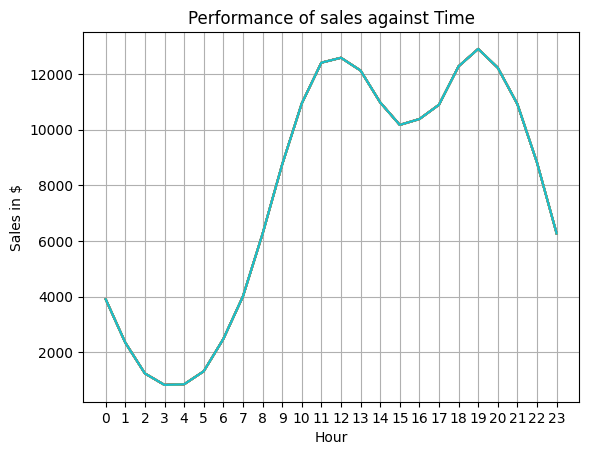

In [19]:
Hour= [hour for hour ,df in all_data.groupby('Hour')]

plt.plot(Hour,all_data.groupby(['Hour']).count())
plt.xticks(Hour)
plt.grid()
plt.title('Performance of sales against Time')
plt.xlabel('Hour')
plt.ylabel('Sales in $')

plt.show()

### Advertisement would be suitable before 11 am (11) or 7 pm (19) 

### Task 4: What products are often sold together?

In [36]:
df=all_data[all_data['Order ID'].duplicated(keep= False)].copy()

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
grouped_products=df['Grouped'].value_counts()
grouped_products.head()

iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Grouped, dtype: int64

### Task 5: What product sold the most and why do I think it sold the most?

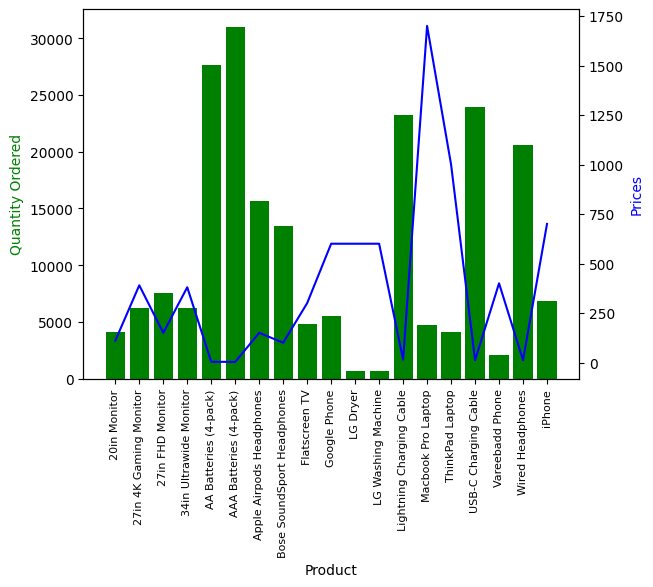

In [65]:
product_group = all_data.groupby('Product')
qty_ordered = product_group['Quantity Ordered'].sum()

products = [product for product, _ in product_group]
prices=product_group['Price Each'].mean()

fig, ax=plt.subplots()

ax2 = ax.twinx()
ax.bar(products, qty_ordered,color='g')
ax2.plot(products,prices, color='b')
ax.set_xticks(products)
ax.set_xticklabels(products, rotation='vertical', size=8)
ax.set_xlabel('Product')
ax.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Prices', color='b')
plt.show()

## AAA Batteries (4-Pack) was the most sold product ,I would say because of its low price,
## shown by the correlation between the price and quantity ordered in the plot below
